In [1]:
# numerical computation
import numpy as np
import itertools
from random import randint
# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline


# dataframe management
import pandas as pd

from sklearn.exceptions import DataConversionWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
from IPython.display import clear_output


%autosave 60

Autosaving every 60 seconds


In [2]:
def opened (path=''):
    
    X_training=[]
    y_training=[]
           
    for j in range(0, 50):
        X_training.append(pd.read_csv('test_train_dataset{}{}_X_train.csv'.format(path,j)))
        y_training.append(pd.read_csv('test_train_dataset{}{}_y_train.csv'.format(path, j)))      
    return X_training, y_training

In [3]:
path_class= ['/class/O_WC_A_', '/class/O_WC_WO_', '/class/P_WC_A_', '/class/P_WC_WO_']
name_all=['ocurrencia_all','ocurrencia_ill', 'presencia_all', 'presencia_ill']

In [4]:
def select_features (path, name):    
    x_train, y_train= opened(path=path)
    selector=pd.DataFrame(columns=x_train[0].columns.values)
    
    for j in range(0, 50):
        selector=selector.append(x_train[j].sum()/x_train[j].shape[0], ignore_index=True)
        
    max_all = pd.DataFrame({'Código' : list(x_train[0].columns.values), 'Valor' : list(selector.sum())})
    select_codes = max_all.sort_values(by='Valor',ascending=False).head(n=100)
    codes=list(select_codes['Código'])
    
    
    with open("feature_selection/freq_{}.txt".format(name), "w") as file:
        file.write(str(list(codes)))
    
    return select_codes

## Selección de caracteriticas en base a la presencia en cada codificación.
    Esta selección es independiente de si es multi-etiqueta o multi-clase ya que sólo valora la presencia de las caracteriticas.

In [5]:
alpha=0
codes = []
for p, n in zip(path_class, name_all):
    codes.append(select_features(path=p,name=n))
    alpha+=1
    print(alpha)

1
2
3
4


In [6]:
OS = codes[0].head(25)
OE = codes[1].head(25)
PS= codes[2].head(25)
PE= codes[3].head(25)
OS_OE = (set(list(OS['Código']))).intersection(set(list(OE['Código'])))
print(len(list(OS_OE)))
PS_PE = (set(list(PS['Código']))).intersection(set(list(PE['Código'])))
print(len(list(PS_PE)))

print('Ocurrencia: ')
Dif_1_OS_OE = (set(list(OS['Código']))).difference(set(list(OE['Código'])))
print('   SanosVSEnfermos: ', Dif_1_OS_OE)
Dif_2_OS_OE = (set(list(OE['Código']))).difference(set(list(OS['Código'])))
print('   EnfermosVSSanos: ', Dif_2_OS_OE)

print('Presencia: ')
Dif_1_PS_PE = (set(list(PS['Código']))).difference(set(list(PE['Código'])))
print('   SanosVSEnfermos: ', Dif_1_PS_PE)
Dif_2_PS_PE = (set(list(PE['Código']))).difference(set(list(PS['Código'])))
print('   EnfermosVSSanos: ', Dif_2_PS_PE)

25
23
Ocurrencia: 
   SanosVSEnfermos:  set()
   EnfermosVSSanos:  set()
Presencia: 
   SanosVSEnfermos:  {'460', '526'}
   EnfermosVSSanos:  {'C09CA', 'C09BA'}


In [7]:
OS_OE = list(OS_OE)
OS_OE.remove('Edad')
OS_OE.remove('Sexo')

PS_PE = list(PS_PE)
PS_PE.remove('Edad')
PS_PE.remove('Sexo')

In [8]:
valores_label = ['OS', 'OE', 'PS', 'PE']
OS_OE = sorted(OS_OE)

PS_PE = sorted(PS_PE)
to_plot_oc = pd.DataFrame()
to_plot_pr = pd.DataFrame()
for i in range(0,4):
    if i ==0 or i ==1:
        extra_1 =codes[i][codes[i]['Código'].isin(OS_OE)]
        extra_2 = extra_1.sort_values(by='Código',ascending=True)
        to_plot_oc[valores_label[i]] = extra_2['Valor']
    else:
        extra_1 =codes[i][codes[i]['Código'].isin(PS_PE)]
        extra_2 = extra_1.sort_values(by='Código',ascending=True)
        to_plot_pr[valores_label[i]] = extra_2['Valor']

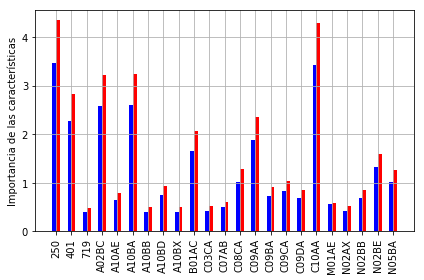

<Figure size 432x288 with 0 Axes>

In [10]:
x = np.arange(len(list(OS_OE)))

y = to_plot_oc[valores_label[0]]/50
z = to_plot_oc[valores_label[1]]/50

A =OS_OE
w = 0.25
ax = plt.subplot(111)
plt.xticks(x + w /2, A, rotation='vertical')

D = ax.bar(x, y, width=w, color='b', align='center')
F = ax.bar(x+w, z, width=w, color='red', align='center')
plt.ylabel('Importancia de las características')
plt.tight_layout()
plt.grid()
plt.show()
plt.savefig("pictures/FR_Ocurrencia.png")

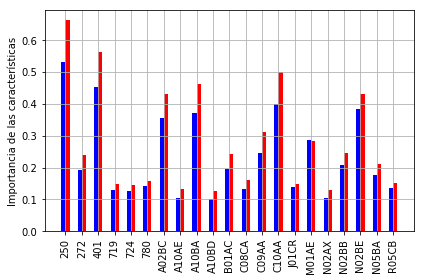

<Figure size 432x288 with 0 Axes>

In [11]:
x = np.arange(len(list(PS_PE)))
k = to_plot_pr[valores_label[2]]/50
j = to_plot_pr[valores_label[3]]/50
A =PS_PE
w = 0.25

ax = plt.subplot(111)
plt.xticks(x + w /2, A, rotation='vertical')

G = ax.bar(x, k, width=w, color='b', align='center')
H = ax.bar(x+w, j, width=w, color='red', align='center')
plt.ylabel('Importancia de las características')
plt.tight_layout()
plt.grid()
plt.show()
plt.savefig("pictures/FR_Presencia.png")